In [5]:
# Read in Labeled Dataset

import pandas as pd

file = 'path'

df = pd.read_excel(file)

#df.head()
#df.describe()

In [6]:
AvgFun = df.groupby('Year').agg({'FunScore': ['mean', 'count']}).reset_index()
AvgFun.columns = ['Year', 'Avg', 'Count']
AvgFun

,Year,Avg,Count
0,2011,3.456522,184
1,2012,3.453608,194
2,2013,3.393574,249
3,2014,3.557522,226
4,2015,3.644351,239
5,2016,3.389105,257
6,2017,3.386707,331
7,2018,3.285303,347


C:\Users\Kelsey\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Kelsey\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Kelsey\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


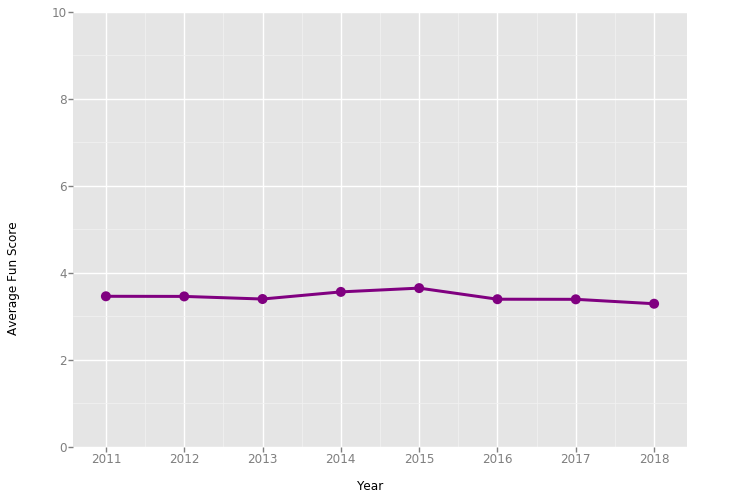

<ggplot: (128976371229)>

In [7]:
# Plot parade fun over time
from ggplot import *

p = ggplot(AvgFun, aes('Year','Avg')) + geom_line(aes(color='purple', size = 3))
p = p + scale_y_continuous(limits = (0, 10)) + geom_point(aes(color = 'purple', size = 100)) 
p + ylab("Average Fun Score")

#Tried to show difference in parade length by sizing the points, but cant control scale in python ggplot? 
#+ geom_point(aes(size = 'Count', color = 'purple'))
#+ scale_size_continuous(range = (1, 18))

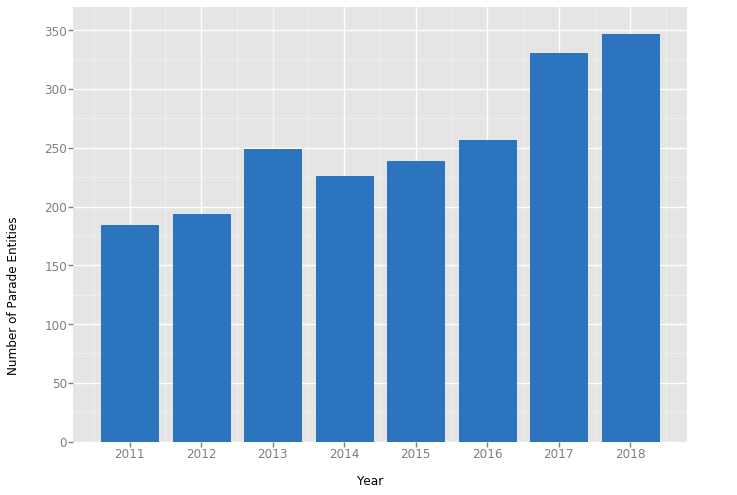

<ggplot: (-9223371907877531718)>

In [13]:
# Show that parades have gotten longer over time though
p = ggplot(aes(x="Year", weight="Count"), AvgFun) + scale_y_continuous(limits = (0, 370)) + geom_bar(aes(fill = '#2C75BE'), position = 'dodge')
p + ylab("Number of Parade Entities")

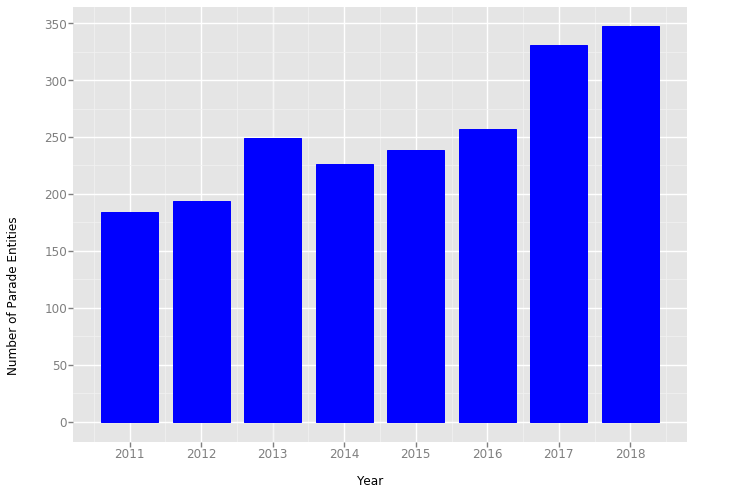

<ggplot: (128972549240)>

In [9]:
# Show that parades have gotten longer over time though
p = ggplot(aes(x="Year", weight="Count"), AvgFun) + geom_bar(aes(fill = 'blue'), position = 'dodge')
p + ylab("Number of Parade Entities")

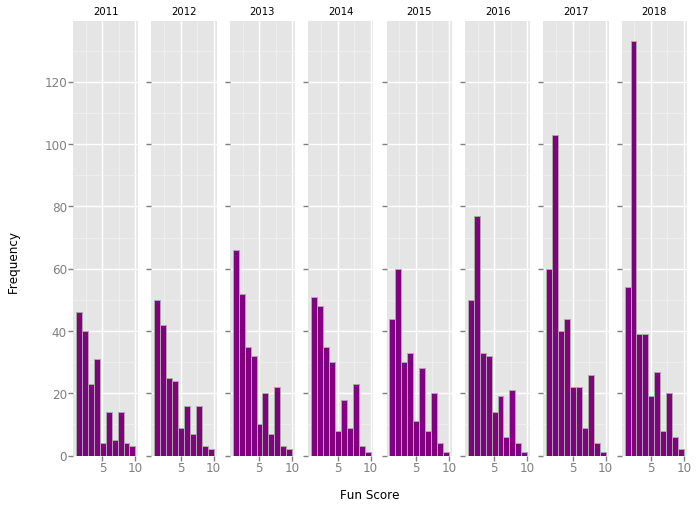

<ggplot: (-9223371907877356028)>

In [14]:
# Show parade fun score distributions over years
p = ggplot(aes(x='FunScore'), data=df)
p = p + geom_histogram(bins=10, boundary = 0.5, color= 'darkgrey', fill='purple') + facet_wrap("Year", nrow = 1) 
p + xlab("Fun Score") + ylab("Frequency")


In [15]:
# Inspect Categories
freq = pd.value_counts(df.Category).to_frame().reset_index()
freq.columns = ['Category', 'Count']
freq

,Category,Count
0,Community Organization,387
1,Large National Company,319
2,Local/Regional Company,284
3,Education,284
4,Religious Organization,258
5,Politics,169
6,Arts and Entertainment,158
7,Sports,67
8,Parade Staple,65
9,Animals,23


In [16]:
#Subset data to show just Political Entities/Companies vs  Fun things
subset = df[(df['Category'] == 'Politics') | (df['Category'] == 'Religious Organization') | \
            (df['Category'] == 'Large National Company') | (df['Category'] == 'Local/Regional Company') | \
            (df['FunScore'] >= 7)] 

# Group Some Categories for chart
#subset.Category[subset.FunScore >= 7] = 'Fun Things'
subset.loc[subset.FunScore >= 7, 'Category'] = 'Fun Things'
subset.loc[subset.Category == 'Large National Company', 'Category'] = 'Company'
subset.loc[subset.Category == 'Local/Regional Company', 'Category'] = 'Company'

check = pd.value_counts(subset.Category).to_frame().reset_index()
check.columns = ['Category', 'Count']
check

C:\Users\Kelsey\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Category,Count
0,Company,603
1,Fun Things,265
2,Religious Organization,258
3,Politics,169


In [17]:
# Get Data frame Counts by Category by Year
counts = subset.groupby(['Year', 'Category']).size().to_frame().reset_index()
counts.columns = ['Year', 'Category', 'Count']
counts.head()

,Year,Category,Count
0,2011,Company,44
1,2011,Fun Things,26
2,2011,Politics,17
3,2011,Religious Organization,29
4,2012,Company,47


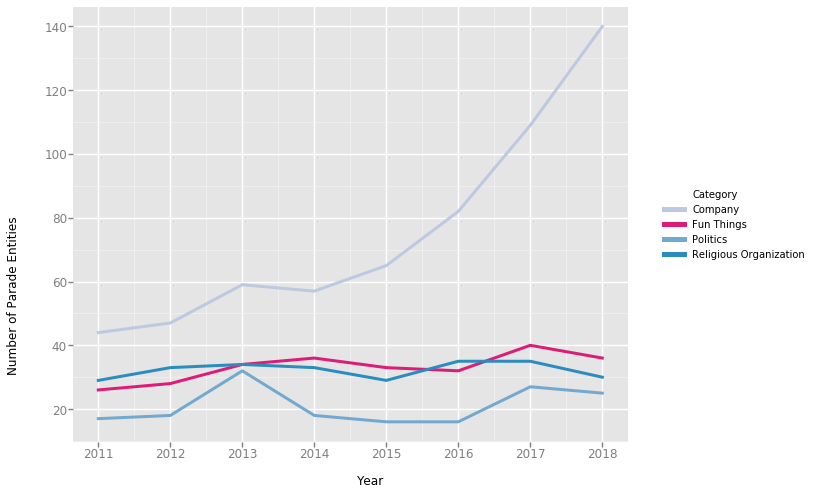

<ggplot: (-9223371907876518277)>

In [18]:
# Chart of Categories of Interest Over Time
p = ggplot(counts, aes('Year','Count', color = 'Category')) + geom_line(aes(size = 3))
p + ylab("Number of Parade Entities") + scale_color_manual(values=("#bdc9e1", "#dd1c77", "#74a9cf", "#2b8cbe"))

In [29]:
# Simplify More

#Subset data to show just Political Entities/Companies vs  Fun things
simple = df[(df['FunScore'] < 3) |
            (df['FunScore'] >= 7)] 

# Group Some Categories for chart
simple.loc[simple['FunScore'] >= 7, 'Category'] = 'Fun'
simple.loc[simple['FunScore'] < 3, 'Category'] = 'Not-so-Fun'

check = pd.value_counts(simple.Category).to_frame().reset_index()
check.columns = ['Category', 'Count']
check

C:\Users\Kelsey\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Category,Count
0,Not-so-Fun,976
1,Fun,265


In [30]:
# Get Data frame Counts by Category by Year
simpcounts = simple.groupby(['Year', 'Category']).size().to_frame().reset_index()
simpcounts.columns = ['Year', 'Category', 'Count']
simpcounts.head()

,Year,Category,Count
0,2011,Fun,26
1,2011,Not-so-Fun,86
2,2012,Fun,28
3,2012,Not-so-Fun,92
4,2013,Fun,34


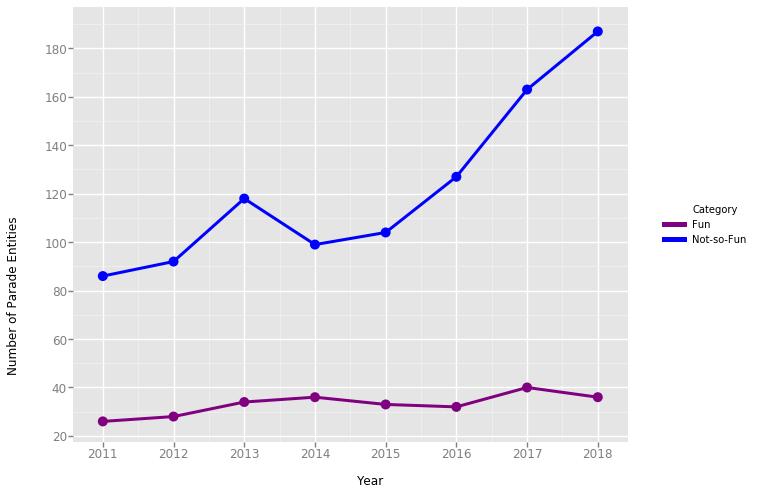

<ggplot: (128978257570)>

In [31]:
# Chart of Categories of Interest Over Time
p = ggplot(simpcounts, aes('Year','Count', color = 'Category')) + geom_line(aes(size = 3)) 
p = p + geom_point(aes(size = 100)) 
p + ylab("Number of Parade Entities") + scale_color_manual(values=("purple", "blue"))